# Project: Investigate a Dataset - TMDb movie data
The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This contain four parts:
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src = '1_f-bF79_zFHGXEhJvx2WPLg.jpeg' alt='alt text' title='title'/>

<a id='intro'></a>
## Introduction

### Dataset discription

I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.
The dataset contains:
* 10866 rows
* 21 columns
    * id : movie id
    * movie_id: A unique identifier for each movie.
    * movie_name: The name of the movies
    * director: The name of the director
    * overview: A brief description of the movie.
    * cast: The name of lead and supporting actors.
    * genres: The stylistic or thematic category of the movie
    * popularity: How the movie is well-known around the world
    * budget: How much did the movie cost
    * revenue: The movies gross income
    * runtime: How many times did the movie is played back
    * vote_count: Number of people voted for the movie
    * vote_average: The average voting of the movie
    * release_date: The date (Y/M/D) in which the movie is released
    * release_year: The year in which the movie is released
    * budget_adj: The increase in budget by year
    * revenue_adj: The increase in revenue by year
    * tagline: Movie's tagline.
    * score: The exact rate of the movie
    * profit: The net income the movie has made
    
The dataset is saved in csv format and used utf-8 encoding method
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Questions for Analysis

* Who is the director with the most popular movie ?
* What is the number of movies released in each year? which has the largest number of released movies?
* Which genres are most popular from year to year?
* What kinds of properties are associated with movies that have high profit?
* For the top 20 movies(score based):
    * Does the popularity of the movie affect its profit?
    * What is the movie with highest score?
    * Which movie in the top 20 rated movies has the most popularity?

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
# helpful character encoding module
import chardet

<a id='wrangling'></a>
## Data Wrangling

In the wake of Observing the dataset and the inquiries identified with this dataset for the examination we will keep just relevent information and erasing the unused information.

In [203]:
#Check the type of character encoding when saved .csv to avoid errors
with open("tmdb-movies.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
# check what the character encoding might be
print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [204]:
#Read the data and print the first 2 rows
df=pd.read_csv('tmdb-movies.csv',encoding = 'utf-8', index_col=False)
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [205]:
#some discriptive statistics on the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [206]:
#Number of rows and columns of the data before data cleaning
df.shape

(10866, 21)

The following function get the score of each movie, as we can use the average rating vote of each movie to describe the rate, but it won't be enough. Since a movie with 9 average rating and only 5 votes cannot be considered better than the movie with 7 as as average rating but 50 votes. 
So we will calculate a weighted rate to get the exact rate of each movie using the following formula:
![](https://image.ibb.co/jYWZp9/wr.png)

m : the minimum votes required
c : mean voting
v : #of voting of the movie

In [207]:
m = df['vote_count'].quantile(0.9)
c = df['vote_average'].mean()
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * c)

### Data Cleaning

Information we want to delete or modify:
* Since the data contains unnecessary columns
* Remove null values(whether in rows or columns)
* Parsing date
* Rename the columns 
* Drop duplicates
* Do standardscaler on the numerical feature 

In [208]:
#Drop unnecessary columns
df.drop(['id', 'homepage','overview','cast', 'tagline', 'keywords',
         'production_companies', 'imdb_id'],
        axis=1, inplace=True)
#Parsing the date
df['release_date'] = pd.to_datetime(df['release_date'], format="%m/%d/%y")
df.rename(columns={'original_title':'movie_name'}, inplace=True)
#Remove any spaces in the dataframe columns
df.rename(columns=lambda x: x.strip(), inplace=True)
#Drop duplicate rows
df.drop_duplicates(inplace=True)
#adding score column to estimate the accurate rate of the movie
df['score'] = df.apply(weighted_rating, axis=1)
#adding profit column to estimate the success of the movie properly
df['profit'] = df['revenue'] - df['budget']
# Label StandardScaler for numerical features
num_features=['popularity', 'budget', 'revenue', 'profit', 'vote_count',
              'budget_adj', 'revenue_adj', 'score', 'runtime']
ct = ColumnTransformer([
        ('scaler', StandardScaler(), num_features)
    ], remainder='passthrough')
df[num_features]=ct.fit_transform(df[num_features])
#Drop rows with null values
df.dropna(axis=0, inplace=True)
df.head()

,popularity,budget,revenue,movie_name,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score,profit
0,32.333342,4.379268,12.595431,Jurassic World,Colin Trevorrow,0.698768,Action|Adventure|Science Fiction|Thriller,2015-06-09,9.284976,6.5,2015,3.511054,9.272359,1.706740,13.856233
1,27.768358,4.379268,2.894026,Mad Max: Fury Road,George Miller,0.571303,Action|Adventure|Science Fiction|Thriller,2015-05-13,10.367290,7.1,2015,3.511054,2.052056,3.956798,2.104161
2,12.463758,3.085308,2.182949,Insurgent,Robert Schwentke,0.539437,Adventure|Science Fiction|Thriller,2015-03-18,3.930732,6.3,2015,2.438354,1.522834,0.855447,1.656913
3,10.524713,5.996718,17.335908,Star Wars: The Force Awakens,J.J. Abrams,1.081162,Action|Adventure|Science Fiction|Fantasy,2015-12-15,8.815915,7.5,2015,4.851929,12.800475,5.374056,19.081072
4,8.686963,5.673228,12.533215,Furious 7,James Wan,1.113028,Action|Crime|Thriller,2015-04-01,4.742033,7.3,2015,4.583754,9.226055,4.321621,13.366730


In [209]:
# The Dataframe shape after cleaning the dataframe
df.shape

(10800, 15)

In [210]:
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10800 non-null  float64       
 1   budget        10800 non-null  float64       
 2   revenue       10800 non-null  float64       
 3   movie_name    10800 non-null  object        
 4   director      10800 non-null  object        
 5   runtime       10800 non-null  float64       
 6   genres        10800 non-null  object        
 7   release_date  10800 non-null  datetime64[ns]
 8   vote_count    10800 non-null  float64       
 9   vote_average  10800 non-null  float64       
 10  release_year  10800 non-null  int64         
 11  budget_adj    10800 non-null  float64       
 12  revenue_adj   10800 non-null  float64       
 13  score         10800 non-null  float64       
 14  profit        10800 non-null  float64       
dtypes: datetime64[ns](1), float64(10), i

In [211]:
#Making sure there is no null values in the dataframe
df.isnull().sum().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

Now we can get insights from the data after cleaning it, we ready to begin investigating the data.
Create visualization to answer the questions we have created in the introduction section

### Research Question 1: Who is the director with the most popular movie ?

In [212]:
#Who is the director with the most popular movie ?
dir_df = df.groupby('director').mean()['popularity'].idxmax()
dir_df

'Colin Trevorrow'

### Research Question 2: What is the number of movies released in each year? which has the largest number of released movies?

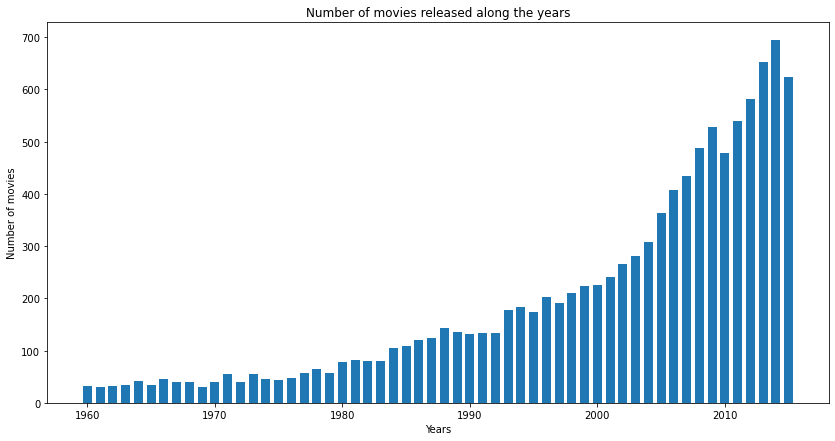

In [213]:
sorted_df = df.sort_values('release_year')
years = sorted_df.release_year.value_counts().index.tolist()
number_of_movies_released = sorted_df.release_year.value_counts().tolist()
plt.figure(figsize=(14, 7))
plt.title("Number of movies released along the years")
plt.xlabel('Years')
plt.ylabel("Number of movies")
plt.bar(x=years, height=number_of_movies_released, width=0.7);

In [214]:
largest_number_movies_year = sorted_df.release_year.value_counts().idxmax()
largest_number_movies_year

2014

### Research Question 3: Which genres are most popular from year to year?

In [215]:
df.genres.value_counts()

Drama                                      711
Comedy                                     707
Documentary                                306
Drama|Romance                              289
Comedy|Drama                               280
                                          ... 
Action|Thriller|Science Fiction|Mystery      1
Comedy|Music|Romance|Foreign                 1
Documentary|Drama|Comedy                     1
Fantasy|Drama|Science Fiction|Family         1
Mystery|Science Fiction|Thriller|Drama       1
Name: genres, Length: 2031, dtype: int64

In [216]:
gen_df = df.groupby(['genres', 'release_year']).mean()['popularity']
gen_df.idxmax()[0]

'Action|Adventure|Science Fiction|Thriller'

### Research Question 4:  What kinds of properties are associated with movies that have high profit?

We will use scatterplot matrix to see the correlation between every column in the dataframe and the profit column

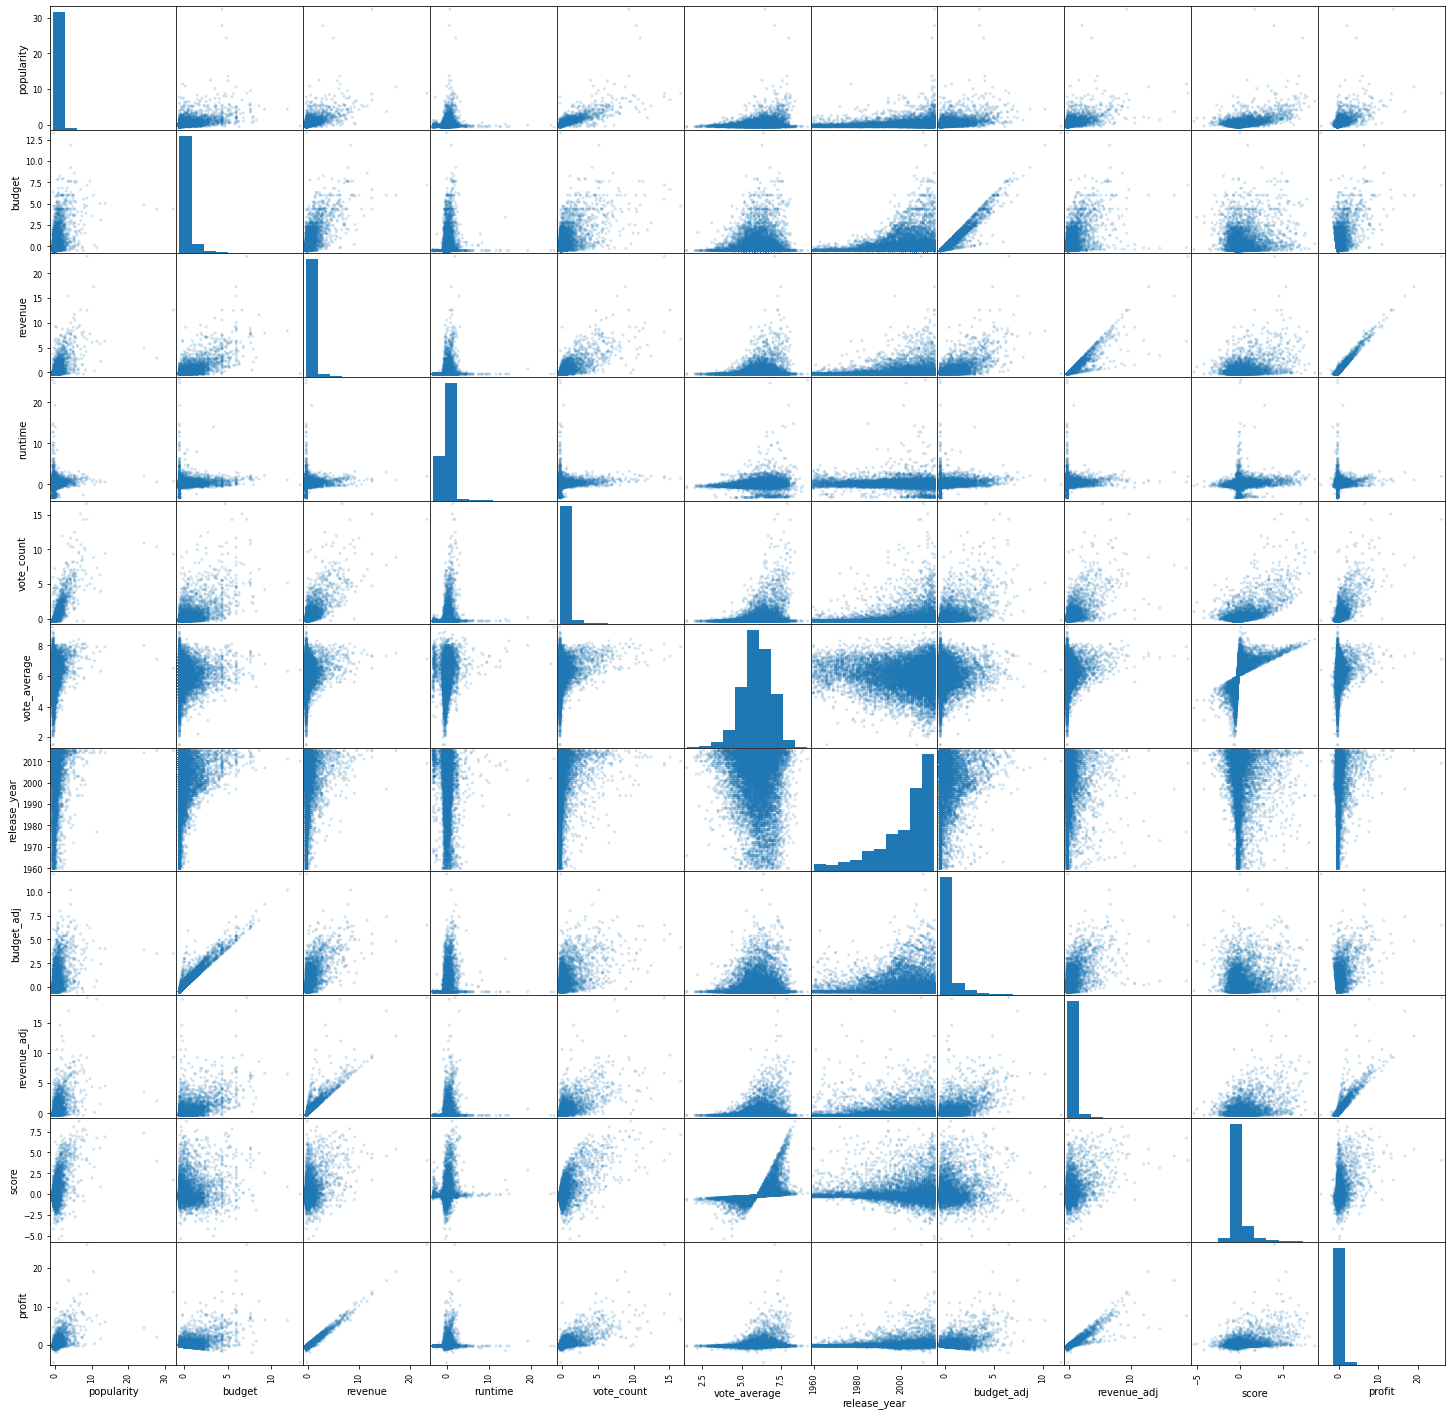

In [217]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(25,25));

From the above visualization we can see that there is:
* Highly positive correlation between:
    * The popularity of the movie its profit
    * Revenue of the movie and its profit
    * number of votes and its profit
    * The increase of the revenue and its profit
* Good positive correlation between:
    * The budget and its profit

### Research Question 5.1: For the top 20 movies, does the popularity of the movie affect its profit?

In [218]:
#Sort movies based on score calculated above
df = df.sort_values('score', ascending=False)
#Print the top 20 movies
top20_movies = df[['movie_name', 'director',  'genres', 'profit', 'score','popularity']][:20]

In [219]:
top20_movies

,movie_name,director,genres,profit,score,popularity
4178,The Shawshank Redemption,Frank Darabont,Drama|Crime,-0.226337,8.745185,6.544384
7269,The Godfather,Francis Ford Coppola,Drama|Crime,2.214218,8.072314,5.090648
2875,The Dark Knight,Christopher Nolan,Drama|Action|Crime|Thriller,8.196989,7.842740,7.818777
2409,Fight Club,David Fincher,Drama,0.130982,7.652959,8.299925
4177,Pulp Fiction,Quentin Tarantino,Thriller|Crime,1.871131,7.585926,7.445932
4179,Forrest Gump,Robert Zemeckis,Comedy|Drama|Romance,6.188673,7.518445,6.068399
629,Interstellar,Christopher Nolan,Adventure|Drama|Science Fiction,4.468010,7.334829,24.298198
650,Whiplash,Damien Chazelle,Drama|Music,-0.150223,7.150965,4.133210
1919,Inception,Christopher Nolan,Action|Thriller|Science Fiction|Mystery|Adventure,6.629258,7.140098,8.715587
7309,The Empire Strikes Back,Irvin Kershner,Adventure|Action|Science Fiction,5.126979,6.997577,4.841101


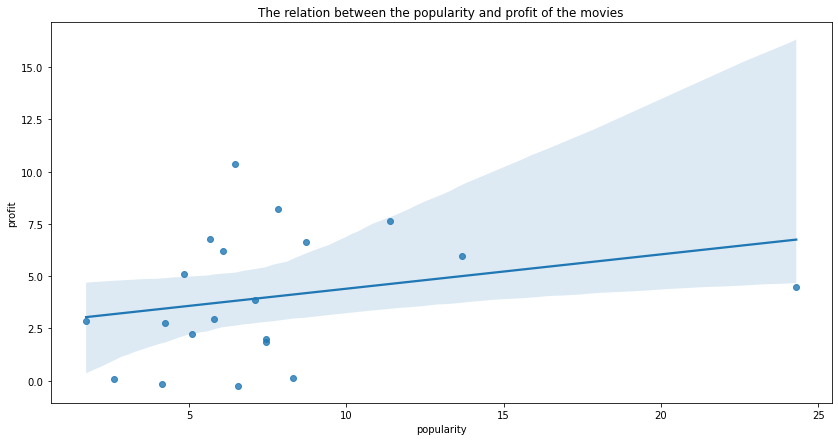

In [220]:
plt.figure(figsize=(14, 7))
plt.title("The relation between the popularity and profit of the movies")
sns.regplot(x=top20_movies['popularity'], y=top20_movies['profit']);

We used the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.
As we see there is a positive correlation between the popularity of the movie and its profit

### Research questioan 5.2: What is the movie with the highest score?

In [221]:
high_score_movie = top20_movies.groupby('movie_name').mean()['score'].idxmax()
high_score_movie

'The Shawshank Redemption'

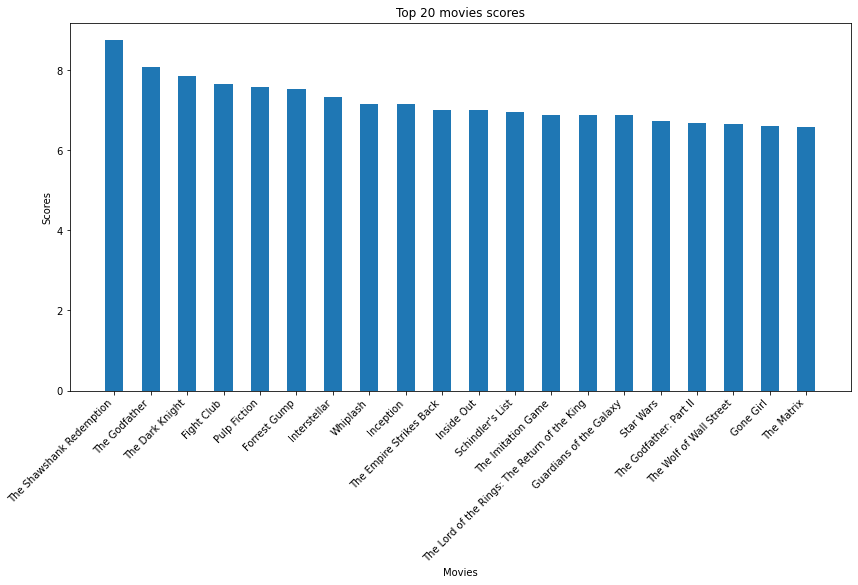

In [222]:
plt.figure(figsize=(14,7))
plt.xticks(fontsize=10,rotation=45, horizontalalignment='right')
plt.margins(0.05)
plt.subplots_adjust(bottom=0.15)
plt.bar(top20_movies.movie_name,top20_movies.score,width=0.5)
plt.title("Top 20 movies scores")
plt.xlabel("Movies")
plt.ylabel("Scores")
plt.show()

### Research Question 5.3: Which movie in the top 10 rated movies has the most popularity

In [223]:
high_popularity_movie = top20_movies.groupby('movie_name').mean()['popularity'].idxmax()
high_popularity_movie

'Interstellar'

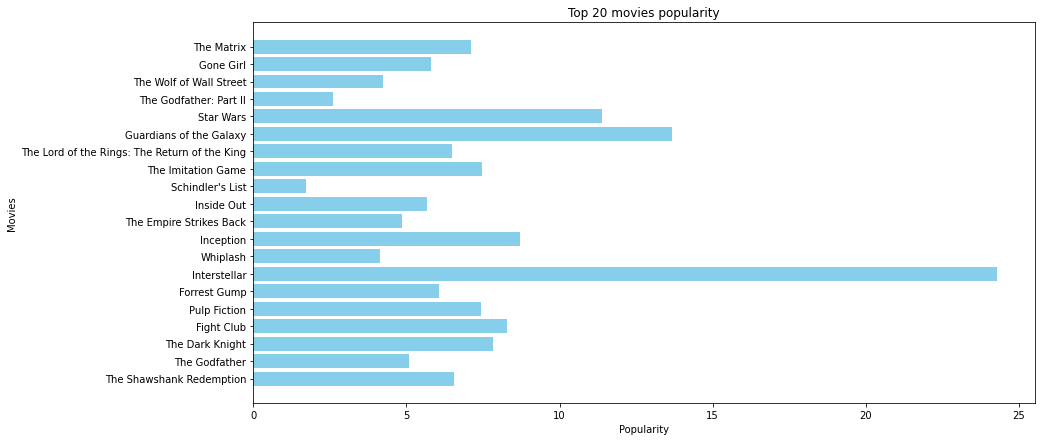

In [224]:
plt.figure(figsize=(14, 7))
plt.title("Top 20 movies popularity")
plt.xlabel("Popularity")
plt.ylabel("Movies")
plt.barh(top20_movies.movie_name, top20_movies.popularity, align='center', color='skyblue')
plt.show()

<a id='conclusions'></a>
## Conclusions

* Colin Trevorrow is the director of the most popular movie
* The year which has the largest number of released movie is 2014
* Action|Adventure|Science Fiction|Thriller is the most popular genres from year to year
* The popularity, Revenue, number of votes, The increase of the revenue are the properities that are associated with movies that have high profit
* The popularity of the movie affect its profit as it shows a positive correlation
* The Shawshank Redemption is the movie with the highest score in the top 20 movies
* Interstellar is the most popular movie in the top 20 movies

In [225]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
Traceback (most recent call last):
  File "/home/mostafasamy/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/mostafasamy/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/mostafasamy/anaconda3/lib/python3.8/site-packages/nbconvert/__main__.py", line 2, in <module>
    main()
  File "/home/mostafasamy/anaconda3/lib/python3.8/site-packages/jupyter_core/application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/home/mostafasamy/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/home/mostafasamy/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "/home/mo

1